In [1]:
import pandas as pd 
import numpy as np 
import math  
import matplotlib.pyplot as plt 
from matplotlib import cm 
%matplotlib inline
import seaborn as sns  
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import re 
import itertools
from IPython.display import Image


data = pd.read_csv("2021-2022 Football Team Stats.csv", encoding='latin-1', delimiter=';')
data.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,52774,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,38,28,8,2,94,26,68,92,2.42,89.2,34.2,55.0,1.45,53367,Mohamed Salah - 23,Alisson
2,3,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176,Robert Lewandowski - 35,Manuel Neuer
3,4,Paris S-G,FRA,1,38,26,8,4,90,36,54,86,2.26,76.5,38.6,37.9,1.00,41188,Kylian Mbappé - 28,Keylor Navas
4,5,Real Madrid,ESP,1,38,26,8,4,80,31,49,86,2.26,74.3,47.0,27.3,0.72,41235,Karim Benzema - 27,Thibaut Courtois


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Attendance       9

In [3]:
data.columns 

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

Se explica cada variable en el marco de datos. Rk : Clasificación del club, Squad : Nombre de la plantilla, Country : País de la plantilla, LgRk : Clasificación del club en la liga local, MP : Partidos jugados, W : Partidos ganados, L : Partidos perdidos, D : Partidos empatados (D = W - L), GF : Goles a favor, GA : Goles en contra, GD : Diferencia de goles (GD = GF - GA), Pts : Número de puntos, Pts/G : Puntos por partido jugado, xG : la probabilidad de que un tiro resulte en gol, xGA : la probabilidad de que un intento en contra resulte en gol, xGD : xGA - xGA, xGD/90 : diferencia de goles esperada por minuto 90, Attendance : número máximo de asistencia,  Top team scorer : nombre del máximo goleador del equipo y número de goles, Goalkeeper : nombre del portero.

In [4]:
#Crear función de paleta de colores 
def get_color(color_name, number_of_colors): 
    pal = list(sns.color_palette(palette=color_name, n_colors=number_of_colors).as_hex())
    return pal

In [5]:
#Extracto del número de goles

top_team_scorer = list(data["Top Team Scorer"])
p = re.compile(r"\d+") 
goals_number = []
for i in top_team_scorer:
    goals_number.append(p.findall(i))

In [6]:
goals_number = list(itertools.chain(*goals_number))

In [7]:
for i in range(len(goals_number)):
    goals_number[i] = int(goals_number[i])

In [8]:
data['TTS Goals'] = goals_number

In [9]:
#Extraer el nombre del Máximo Goleador de la columna Máximo Goleador del Equipo

q = re.compile(r"[a-zÀ-ÿ]+", re.IGNORECASE) 
TTS_names = []    #Máximo goleador del equipo Nombre
for i in top_team_scorer:
    TTS_names.append(q.findall(i))

In [10]:
names = []
for i in range(len(TTS_names)):
    names.append(" ".join(TTS_names[i]))

In [11]:
data["TTS name"] = names #Add new column named "TTS name"

In [12]:
data.drop('Top Team Scorer', axis=1, inplace=True)

In [13]:
data.rename(columns={'TTS name': 'Top Team Scorer'}, inplace=True) 
data.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Goalkeeper,TTS Goals,Top Team Scorer
0,1,Manchester City,ENG,1,38,29,6,3,99,26,...,93,2.45,89.0,27.2,61.9,1.63,52774,Ederson,15,Kevin De Bruyne
1,2,Liverpool,ENG,2,38,28,8,2,94,26,...,92,2.42,89.2,34.2,55.0,1.45,53367,Alisson,23,Mohamed Salah
2,3,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,33176,Manuel Neuer,35,Robert Lewandowski
3,4,Paris S-G,FRA,1,38,26,8,4,90,36,...,86,2.26,76.5,38.6,37.9,1.00,41188,Keylor Navas,28,Kylian Mbappé
4,5,Real Madrid,ESP,1,38,26,8,4,80,31,...,86,2.26,74.3,47.0,27.3,0.72,41235,Thibaut Courtois,27,Karim Benzema


In [14]:
data = data[['Rk',
 'Squad',
 'Country',
 'LgRk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'Pts',
 'Pts/G',
 'xG',
 'xGA',
 'xGD',
 'xGD/90',
 'Attendance',
 'Goalkeeper',
'Top Team Scorer',
 'TTS Goals'
 ]]

Mejor equipo en función del número de puntos

In [15]:
df_best_squad = data[["Squad", "Country", "Pts"]].groupby(["Country", "Squad"]).agg(lambda x: x).reset_index()

Se obtienen los 3 mejores equipos en funcion del número de puntos de cada liga

In [16]:
france = df_best_squad[df_best_squad["Country"]=='FRA'].sort_values("Pts", ascending=False)[:3]
italia = df_best_squad[df_best_squad['Country']=='ITA'].sort_values("Pts", ascending=False)[:3]
englend = df_best_squad[df_best_squad['Country']=='ENG'].sort_values("Pts", ascending=False)[:3]
germany = df_best_squad[df_best_squad['Country']=='GER'].sort_values("Pts", ascending=False)[:3]
spane = df_best_squad[df_best_squad['Country']=='ESP'].sort_values("Pts", ascending=False)[:3]

squad_pts = france.append(italia).append(englend).append(germany).append(spane)

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\2711829386.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\2711829386.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\2711829386.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\2711829386.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Se crea una etiqueta que contenga el club y el país

In [17]:
squad_pts["Squad_country"] = squad_pts[["Squad", "Country"]].agg(" - ".join, axis=1)

In [19]:
#Gráfico de barras horizontales para visualizar los mejores equipos en términos de puntos 

gist_pal = get_color("gist_earth_r", len(squad_pts))
fig = px.bar(squad_pts.sort_values(by="Pts"), x='Pts', y="Squad_country", orientation='h', 
             color="Squad", color_discrete_sequence=gist_pal,
             template="simple_white", 
             text_auto=True,
             title='Best squad in termes of number of points'
            )
fig.update_layout(title={'y':0.9},
                  title_font_size=30, 
                  title_font_family="Impact",
                  title_font_color='black',
                  height=400,
                  showlegend=False,
                  margin=dict(l=10)
                 )
fig.update_xaxes(title='Number of points',
                color='black', 
                tickfont_family='Microsoft Tai Le', 
                titlefont_family='Microsoft Tai Le')
fig.update_yaxes(title='',
                color='black', 
                tickfont_family='Microsoft Tai Le', 
                titlefont_family='Microsoft Tai Le')
fig.update_traces(textposition='outside')


Ahora se visualizaran los mejores equipos goleadores de europa

In [20]:
#Dataframe del mejor goleador del equipo

best_scorer = data[["Squad", "Country", "Top Team Scorer", "TTS Goals"]]\
                            .groupby(["Top Team Scorer", "Squad", "Country"])\
                                .agg(lambda x: x)\
.reset_index().sort_values(by="TTS Goals", ascending=False)

#Crear una etiqueta para agrupar el equipo del mejor goleador y el pais 

best_scorer["TTS Squad and Country"] = best_scorer[["Top Team Scorer", "Squad", "Country"]].agg(" - ".join, axis=1)
best_scorer = best_scorer[:15]

In [21]:
#Ploteamos el grafico

fig = px.bar(best_scorer.sort_values(by="TTS Goals", ascending=False), x="TTS Goals", y="TTS Squad and Country", 
            color="TTS Squad and Country", 
            orientation='h',
            title="Top Team Scorer", 
            color_discrete_sequence=get_color("bone", len(best_scorer)),
            template='simple_white',
             text_auto=True
            )
fig.update_layout(title={'y': 0.9},
                title_font_size=30,
                title_font_family='Impact',
                title_font_color='black',
                showlegend=False,
                 height=400)
fig.update_xaxes(title="Number of goals",
                tickfont_family="Microsoft Tai Le",
                titlefont_family="Microsoft Tai Le",)
fig.update_yaxes(title="",
                tickfont_family='Microsoft Tai Le',
                tickfont_size=12)
fig.update_traces(textposition='outside')


Mejores porteros

In [23]:
#Dataframe de porteros 

goal_keeper = data[["Goalkeeper", "Squad", "Country", "GA"]].\
        groupby(["Goalkeeper", "Squad", "Country"])\
        .agg(lambda x: x).reset_index().sort_values("GA", ascending=True)[:20]
 

goal_keeper["size_points"] = [list(goal_keeper["GA"])[i]*j for i, j in zip(range(len(goal_keeper)), np.linspace(1, 5, 20))]

#Crear etiqueta para el nombre del portero, equipo y pais

goal_keeper["Goalkeeper sq country"] = goal_keeper[["Goalkeeper", "Squad", "Country"]].agg(' - '.join, axis=1)
goal_keeper.head()

,Goalkeeper,Squad,Country,GA,size_points,Goalkeeper sq country
9,Alisson,Liverpool,ENG,26,26.000000,Alisson - Liverpool - ENG
22,Ederson,Manchester City,ENG,26,31.473684,Ederson - Manchester City - ENG
95,Yassine Bounou,Sevilla,ESP,30,42.631579,Yassine Bounou - Sevilla - ESP
85,Thibaut Courtois,Real Madrid,ESP,31,50.578947,Thibaut Courtois - Real Madrid - ESP
63,Mike Maignan,Milan,ITA,31,57.105263,Mike Maignan - Milan - ITA


In [24]:
goal_keeper['label'] = ['<b>'+i+'<br>Goals Aainst: '+format(j, ',') for i, j in zip(goal_keeper["Goalkeeper sq country"], goal_keeper["GA"])]

In [25]:
#crear coordenadas x e y para los puntos de dispersión 

goal_keeper["X"] = [0]*len(goal_keeper)
list_y = [i*1 for i in range(0, len(goal_keeper))] 
list_y.reverse()
goal_keeper["Y"] = list_y
goal_keeper.head()

,Goalkeeper,Squad,Country,GA,size_points,Goalkeeper sq country,label,X,Y
9,Alisson,Liverpool,ENG,26,26.000000,Alisson - Liverpool - ENG,<b>Alisson - Liverpool - ENG<br>Goals Aainst: 26,0,19
22,Ederson,Manchester City,ENG,26,31.473684,Ederson - Manchester City - ENG,<b>Ederson - Manchester City - ENG<br>Goals Aa...,0,18
95,Yassine Bounou,Sevilla,ESP,30,42.631579,Yassine Bounou - Sevilla - ESP,<b>Yassine Bounou - Sevilla - ESP<br>Goals Aai...,0,17
85,Thibaut Courtois,Real Madrid,ESP,31,50.578947,Thibaut Courtois - Real Madrid - ESP,<b>Thibaut Courtois - Real Madrid - ESP<br>Goa...,0,16
63,Mike Maignan,Milan,ITA,31,57.105263,Mike Maignan - Milan - ITA,<b>Mike Maignan - Milan - ITA<br>Goals Aainst: 31,0,15


In [27]:
#Ploteamos

fig = px.scatter(goal_keeper, x='X', y='Y', size="size_points", 
                color="Goalkeeper", 
                text="label", 
                color_discrete_sequence=get_color('viridis_r', len(goal_keeper)),
                 title = "Best Goalkeeper",
                size_max=30,
                template='simple_white')
fig.update_traces(textposition='middle right',
                 textfont_size=15, 
                 textfont_family='Ink Free')
fig.update_xaxes(showgrid=False, visible=False, zeroline=False)
fig.update_yaxes(showgrid=False, visible=False, zeroline=False)
fig.update_layout(title={'x': 0.78, 'y': 0.99},
                 title_font_size=28,
                 title_font_family='Impact',
                 title_font_color='black',
                 width=620, 
                 height=1100, 
                 margin=dict(t=0, l=0, r=0, b=0),
                 showlegend=False)


Mejor asistencia al estadio en europa 

In [28]:
Attendance = data[["Squad", "Country", "Attendance"]] #Attendance dataframe
Attendance["squad/country"] = Attendance[["Squad", "Country"]].agg(" - ".join, axis=1)
Attendance["label"] = [i+'\n'+format(j, '') for i, j in zip(Attendance["squad/country"], Attendance["Attendance"])]
Attendance = Attendance[:25].sort_values(by="Attendance", ascending=False)

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\3577675530.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\3577675530.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



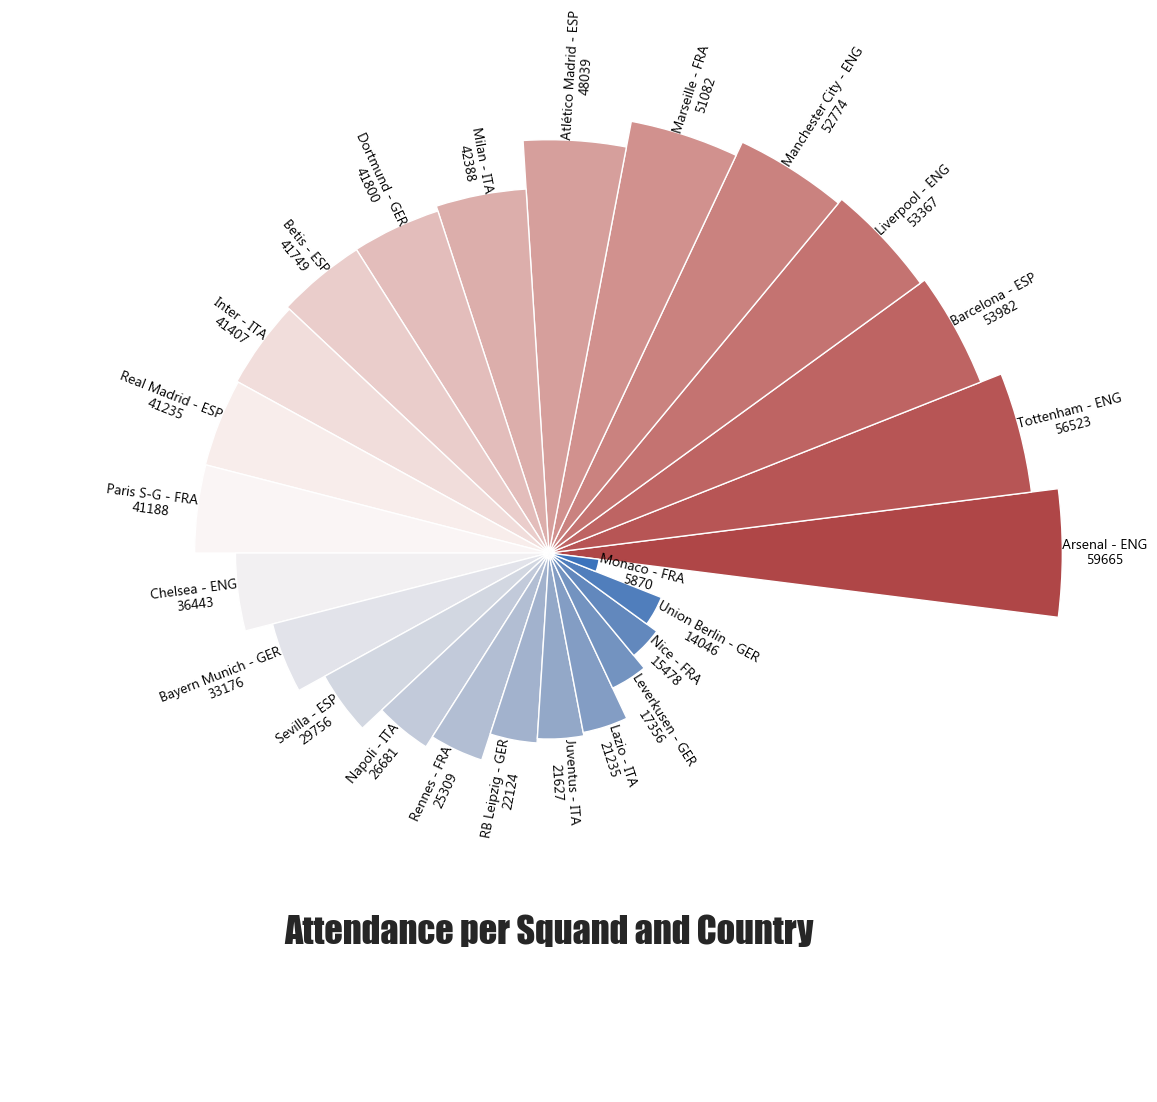

In [29]:
#Ploteamos grafico circular

plt.figure(figsize=(14, 14))
sns.set_style('whitegrid')
ax = plt.subplot(111, polar=True)
ax.grid(False)
plt.axis("off")
fontlabels = {
    'family': 'Microsoft Tai Le',
    'color': 'black',
    'size': '10',
}

lowerlimit=0
heights=list(Attendance["Attendance"])
width=2*np.pi/len(Attendance)
indexes = [i for i in range(1, len(Attendance)+1)]
angles = [element*width for element in range(len(Attendance))]
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerlimit,
             linewidth=1, edgecolor='white', color=get_color('vlag_r', len(Attendance)))

labelpadding = 15

for bar, angle, height, label in zip(bars, angles, heights, Attendance["label"]):
    rotation = np.rad2deg(angle)
    alignement=""
    if (angle > np.pi/2) & (angle < 3*np.pi/2): 
        alignement="right"
        rotation = rotation + 180
    else : 
        alignement ="left"
    ax.text(x=angle, y=lowerlimit+bar.get_height()+labelpadding,
           s=label, ha=alignement, va='center', rotation=rotation,
           rotation_mode='anchor',
           multialignment='center',
           fontdict=fontlabels)
    ax.set_thetagrids([], labels=[])
    ax.set_rlabel_position(-14)
    ax.set_title("Attendance per Squand and Country", fontdict={'fontsize': 26, 'fontfamily': 'Impact'}, loc='center',y=0.13)
plt.show()

Ahora se visualizaran los partidos ganados, perdidos y empatados, de los cinco mejores equipos de cada liga

In [31]:
#Dataframe de partidos 

matches = data[["Squad", "Country", "W", "L", "D"]]\
.groupby(["Country", "Squad"]).agg(lambda x: x).reset_index()

#Nuevo dataframe con solo los 5 mejores equipos de cada liga 

match = pd.DataFrame()
countries = list(data["Country"].value_counts().index)
for i in countries: 
    match = match.append(matches[matches["Country"]==i].sort_values("W", ascending=False)[:5])

match = match.sort_values(by="W", ascending=False) #descending sort dataframe by W matches
match["label"] = match[["Squad", "Country"]].agg(' - '.join, axis=1) #create label
match.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\4057550250.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\4057550250.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\4057550250.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\4057550250.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\4057550250.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,Country,Squad,W,L,D,label
11,ENG,Manchester City,29,3,6,Manchester City - ENG
10,ENG,Liverpool,28,2,8,Liverpool - ENG
54,FRA,Paris S-G,26,4,8,Paris S-G - FRA
88,ITA,Milan,26,4,8,Milan - ITA
35,ESP,Real Madrid,26,4,8,Real Madrid - ESP


In [32]:
#Ploteamos el grafico

widths = np.array([0.2]*25)
fig = px.bar(match.sort_values(by="W", ascending=True), 
            x=["W", "L", "D"],
            y="label", 
            title="Win, Loss and Draw matches",
            orientation='h',
            template = "simple_white",
             color_discrete_sequence=['#46986a', '#ff5252', '#ffff66'])

fig.update_layout(title={'y': 0.9},
                  title_font_size=30, 
                  title_font_family="Impact", 
                  title_font_color="black",
                  height=500,
                  legend=dict(
                    title='',
                    yanchor='top', 
                    y=1.1,
                    xanchor='center', 
                    x=0.8, 
                    orientation='h',
                    font=dict(family='Microsoft Tai Le',
                              size=14,
                              color='Black')),
                  plot_bgcolor='aliceblue', 
                  paper_bgcolor='aliceblue')

fig.update_xaxes(title='Number of matches',
                 titlefont_family='Microsoft Tai Le',
                 titlefont_size=16,
                 tickfont_family='Microsoft Tai Le',
                 tickfont_size=12)
                
fig.update_yaxes(title="",
                tickfont_family='Microsoft Tai Le',
                 tickfont_size=10,
                titlefont_family='Microsoft Tai Le',
                 titlefont_size=14)


Visualizacion de los goles

In [33]:
#Dataframe de goles

goals_df = data[["Squad", "Country", "GF", "GA", "GD"]].groupby(["Country", "Squad"]).agg(lambda x:x).reset_index()
goals = pd.DataFrame()

for i in countries: 
    goals = goals.append(goals_df[goals_df["Country"]==i].sort_values(by='GF', ascending=False)[:5])
    
goals["label"] = goals[["Squad", "Country"]].agg(' - '.join, axis=1) 

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\930141313.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\930141313.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\930141313.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\930141313.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\930141313.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
#Ploteamos 

goals = goals.sort_values(by="GF", ascending=True)
fig = make_subplots(rows=1, cols=3, shared_yaxes=True)
fig.append_trace(go.Bar(x=goals["GF"], y=goals["label"], orientation='h', 
                        marker_color=get_color("light:seagreen", len(goals)),
                       marker_line_color='black',
                       marker_line_width=0.15, name="GF", text=[str(i) for i in list(goals["GF"])], 
                       textposition='outside'), row=1,col=1)

fig.append_trace(go.Bar(x=goals["GA"], y=goals["label"], orientation='h',
                       marker_color=get_color("light:r", len(goals)), 
                       marker_line_color='black', 
                       marker_line_width=0.15, name="GA", text=[str(i) for i in list(goals["GA"])],
                       textposition='outside'), row=1, col=2)

fig.append_trace(go.Bar(x=goals["GD"], y=goals["label"], orientation='h',
                       marker_color=get_color("light:y", len(goals)),
                       marker_line_color='black',
                       marker_line_width=0.15, name="GD", text=[str(i) for i in list(goals["GD"])],
                       textposition='outside'), row=1, col=3)

fig.update_layout(title={'text': 'Number of GF, GA and GD','x':0.1, 'y':0.92},
                titlefont_size=30,
                titlefont_family='Impact',
                titlefont_color='black',
                height=600,
                template='simple_white',
                 xaxis1=dict(title="Number of GF", titlefont_size=16, titlefont_family='Microsoft Tai Le'),
                 xaxis2=dict(title="Number of GA", titlefont_size=16, titlefont_family='Microsoft Tai Le'),
                 xaxis3=dict(title="Number of GD", titlefont_size=16, titlefont_family='Microsoft Tai Le'),
                  showlegend=False)

Número de puntos por partido jugado

In [35]:
pts_g = data[["Squad", "Country", "Pts/G"]][:20] #Pts/G dataframe
pts_g["label"] = pts_g[["Squad", "Country"]].agg(' - '.join, axis=1)
pts_g.head()

,Squad,Country,Pts/G,label
0,Manchester City,ENG,2.45,Manchester City - ENG
1,Liverpool,ENG,2.42,Liverpool - ENG
2,Bayern Munich,GER,2.26,Bayern Munich - GER
3,Paris S-G,FRA,2.26,Paris S-G - FRA
4,Real Madrid,ESP,2.26,Real Madrid - ESP


In [36]:
#Grafico de pie

fig = px.pie(pts_g, values="Pts/G", color='label', color_discrete_sequence=get_color('magma', len(pts_g)), names='label', 
            hole=None)

fig.update_traces(textposition='inside', 
                 textinfo='label+text+value')

fig.update_layout(title={'text': 'Points per match played', 'x': 0.5, 'y':0.95},
                  titlefont_size=30, 
                  titlefont_family='Impact',
                 showlegend=False,
                 height=500, 
                 width=500,
                 margin=dict(b=5, l=5, r=5),)


Goles esperados

In [37]:
expected = data[["Squad", "Country", "xG", "xGA", "xGD"]] #expected dataframe 
expected["label"] = ['<b>'+i+'<br>'+j for i, j in zip(expected['Squad'], expected["Country"])] #create a label
expected = expected.sort_values(by='xG', ascending=False)[:25]
expected.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_3020\2864653438.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Squad,Country,xG,xGA,xGD,label
1,Liverpool,ENG,89.2,34.2,55.0,<b>Liverpool<br>ENG
0,Manchester City,ENG,89.0,27.2,61.9,<b>Manchester City<br>ENG
2,Bayern Munich,GER,88.1,37.1,51.0,<b>Bayern Munich<br>GER
6,Inter,ITA,81.4,39.2,42.2,<b>Inter<br>ITA
3,Paris S-G,FRA,76.5,38.6,37.9,<b>Paris S-G<br>FRA


In [38]:
#Ploteamos

rxG_list = list(expected["xG"])
rxG_list.append(rxG_list[0])
rxGA_list = list(expected["xGA"])
rxGA_list.append(rxGA_list[0])
rxGD_list = list(expected["xGD"])
rxGD_list.append(rxGD_list[0])
theta_list = list(expected["label"])
theta_list.append(theta_list[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=rxG_list, theta=theta_list, fill='toself', line_color=get_color('rocket_r', len(expected))[6], 
                             name='xG'))

fig.add_trace(go.Scatterpolar(r=rxGA_list, theta=theta_list, fill="toself", line_color=get_color('rocket_r', len(expected))[12],
                             name="xGA"))

fig.add_trace(go.Scatterpolar(r=rxGD_list, theta=theta_list, fill='toself', line_color=get_color('rocket_r', len(expected))[18],
                             name="xGD"))

fig.update_traces(mode='lines+markers',marker=dict(symbol='square'))

fig.update_layout(height=700, 
                 width=800,
                  title={'text': "Expected goals xG, Expected Goals Against xGA and Expected difference xGD (xGD = xG - xGA)",
                         'x':0.050,
                        'y': 0.95},
                  titlefont_family='cambria',
                  titlefont_size=18,
                  template=None,
                  polar = dict(
                  radialaxis_tickfont_size=14,
                  radialaxis_tickfont_family='Arial'),
                 legend=dict(yanchor="bottom",
                            xanchor='center',
                            x=0.5,
                            y=-0.19,
                            orientation='h',
                            font=dict(size=16)),)

Distribucion de los partidos ganados, empatados y perdidos, en funcion de los goles marcados, de los goles en contra y de la diferencia de goles. 

In [39]:
dist = data[["Country", "W", "D", "L", "GF", "GA", "GD"]] #Dataframe
countries = list(dist["Country"].value_counts().index) #list of countriesLista de paises

color = get_color("magma", len(countries))
color1 = get_color("bone", len(countries))
color2 = get_color("viridis", len(countries))
color3 = get_color('mako', len(countries))
color4 = get_color('rocket', len(countries))
color5 = get_color('icefire', len(countries))

In [40]:
#Ploteamos

fig = make_subplots(rows=2, cols=3, shared_yaxes=True, horizontal_spacing=0.02)
for c, i in zip(countries, color):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["W"]), 
                        line_color=i,
                       name=c,
                        ), row=1, col=1)
for c, i in zip(countries, color1):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["L"]), 
                        line_color=i,
                       name=c,
                        ), row=1, col=2)
for c, i in zip(countries, color2):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["D"]), 
                        line_color=i,
                       name=c,
                        ), row=1, col=3)
for c, i in zip(countries, color3):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["GF"]),
                              line_color=i,
                              name=c), row=2, col=1)
for c, i in zip(countries, color4):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["GA"]),
                              line_color=i,
                              name=c), row=2, col=2)
for c, i in zip(countries, color5):
    fig.append_trace(go.Violin(x=list(dist[dist["Country"]==c]["GD"]),
                              line_color=i,
                              name=c), row=2, col=3)
fig.update_traces(orientation='h', side='positive', points=False, width=3)

fig.update_layout(
    height=600,
    width=1200,
    template='simple_white', 
    showlegend=False,
    xaxis1=dict(title='Win matches', titlefont_size=14, titlefont_family='Arial', 
                minor=dict(nticks=5, showgrid=False, ticklen=4, tickmode='auto')),
    xaxis2=dict(title="Loss matches", titlefont_size=14, titlefont_family='Arial',
               minor=dict(nticks=5, showgrid=False, ticklen=4, tickmode='auto')),
    xaxis3=dict(title='Draw matches', titlefont_size=14, titlefont_family='Arial',
               minor=dict(nticks=5, showgrid=False, ticklen=4, tickmode='auto')),
    xaxis4=dict(title='Number of goals for "GF"', titlefont_size=14, titlefont_family='Arial',
                tickvals=[0, 20, 40, 60, 80, 100],
                minor=dict(showgrid=False, ticklen=4)),
    xaxis5=dict(title='Number of goals against "GA"', titlefont_size=14, titlefont_family='Arial', 
                tickvals=[i*20 for i in range(6)],
               minor=dict(nticks=5, showgrid=False, ticklen=4)),
    xaxis6=dict(title='Number of goals draw "GD"', titlefont_size=14, titlefont_family='Arial',
                tickvals=[-80, -50, -20, 10, 30, 60, 90],
               minor=dict(showgrid=False, ticklen=4)),
    title=dict(text='Distributions of Win, Loss and Draw matches', font_size=30, font_family='Impact'),
    yaxis=dict(showgrid=True),
    yaxis1=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis2=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis3=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis4=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis5=dict(showgrid=True, gridcolor='grey', gridwidth=0.15),
    yaxis6=dict(showgrid=True, gridcolor='grey', gridwidth=0.15), 
    plot_bgcolor = get_color('light:b', len(countries))[0],)